# Lab assignment: comparison of Boosting methods

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/yakushima.jpg" style="width:600px;">

<div style="float: right;">(Forest at 屋久島(Kagoshima), Japan, photo by <a href=https://www.flickr.com/photos/myneur/10795515823>Indrik Myneur</a>)</div>

In this assignment we will perform an experimental comparison of different ensemble methods, with a focus on boosting strategies. By testing the effectiveness of these methods across a variety of datasets we will draw some conclusions on their general applicability.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Ensembles environment files](https://github.com/albarji/teaching-environments-ensembles).

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Shift+Tab to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data loading

In this assignment we will use the same datasets as in the Random Forests and Ensembles assignment. If you managed to create the pickle file with all datasets information, you can just copy it to this notebook's folder, and run the following code.

In [2]:
import pickle as pkl

with open('datasets.pkl', 'rb') as file:
    datasets = pkl.load(file)

If you have loaded the data properly, the following should print the whole structure:

In [3]:
print(datasets)

{'breastcancer': {'train': (array([[-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
        -0.98230246,  0.51629307],
       [-1.6961842 ,  0.90363699,  1.5238351 , ...,  0.97475967,
         0.62937942,  0.51629307],
       [-0.69885702,  0.90363699, -0.33185742, ...,  0.97475967,
        -0.17646152,  0.51629307],
       ...,
       [-0.69885702,  0.90363699,  2.4516814 , ..., -1.0184056 ,
        -0.17646152,  0.51629307],
       [ 0.29847018, -0.8905408 ,  0.59598884, ..., -1.0184056 ,
         1.4352204 , -1.9227466 ],
       [-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
        -0.98230246,  0.51629307]]), array([ 1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.

## Experimental setup

Our objective here is to test four different ensemble strategies to discover which one is more effective in attaining high accuracy rates on classification problems. The algorithms under test will be:

* Random Forests
* AdaBoost
* Gradient Boosting
* Extreme Gradient Boosting

The first three methods are implemented in the <a href="http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble">**sklearn** package</a>. The Extreme Gradient Boosting method, however, is an <a href="https://github.com/dmlc/xgboost">independent package</a>, which however features a wrapper that allows seamless integration into scikit-learn workflows.

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

To test all methods in a comparable setting, we will perform hyper-parameter optimization, finding the set of parameters that produces the best accuracies in cross-validation over the training set. The test sets will be used only for measuring accuracies. In all four ensemble strategies we will use 50 decision trees.

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Compute the test accuracies for the Random Forest, AdaBoost, Gradient Boosting and Extreme Gradient Boosting methods for all the datasets. To do so, you must perform an optimization of hyper-parameters through cross-validation. In particular, the hyper-parameters to tune and recommended ranges are:<br>
<br>
     <b>Random Forest</b>
    <ul>
     <li>"max_depth": [3, 5, 10, 15, 20, 25, 30, None]</li>
     <li>"max_features": ["sqrt", "log2", None]</li>
     <li>"min_samples_split": [2, 4, 8, 16, 32, 64]</li>
     <li>"min_samples_leaf": [1, 2, 4, 8, 16, 32, 64]</li>
     <li>"bootstrap": [True, False]</li>
     <li>"criterion": ["gini", "entropy"]</li>
    </ul>
     <b>AdaBoost</b>
    <ul>
     <li>"learning_rate": np.logspace(-5,0,12)</li>
    </ul>
     <b>Gradient Boosting</b>
    <ul>
     <li>"loss": ["deviance", "exponential"]</li>
     <li>"learning_rate": np.logspace(-5,0,12)</li>
     <li>"max_depth": [3, 5, 10, 15, 20, 25, 30, None]</li>
     <li>"min_samples_split": [2, 4, 8, 16, 32, 64]</li>
     <li>"min_samples_leaf": [1, 2, 4, 8, 16, 32, 64]</li>
     <li>"subsample" : [0.1, 0.2, 0.5, 0.9, 1]</li>
     <li>"max_features": ["sqrt", "log2", None]</li>
    </ul>
     <b>Extreme Gradient Boosting</b>
    <ul>
     <li>'gamma' : [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]</li>
     <li>'max_depth': [6, 9, 12]</li>
     <li>'subsample': [0.5, 0.9, 1.0]</li>
     <li>'colsample_bytree': [0.5, 0.9, 1.0]</li>
     <li>'reg_lambda' : [0, 1e-3, 1e-2, 1e-1, 1, 10, 100]</li>
    </ul>
     To perform the tuning it is recommended that you use <b>RandomizedSearchCV</b> from sklearn. Make sure that around 50 hyper-parameter choices are tested in each tuning. Note that RandomizedSearchCV will produce a warning for those parameter grids where the total amount of possible parameter choices is smaller than 50, but it will still produce correct results.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Long waiting times? Make sure to look into the options of RandomizedSearchCV. Configuring a correct parallelization will help you accelerate training times.
</font>

***

In [5]:
####### INSERT YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def trainscore(X, y, Xte, yte, estimator):
    """Trains an estimator and returns score over a test set"""
    estimator.fit(X, y)
    return estimator.score(Xte, yte) * 100

def tune(X, y, Xte, yte, estimator, param_dist, n_iter_search, n_jobs):
    """Performs hyperparameter tuning over an estimator"""
    search = RandomizedSearchCV(estimator, param_distributions=param_dist, n_iter=n_iter_search, n_jobs=n_jobs)
    return trainscore(X, y, Xte, yte, search)

ntrees = 50

models = {
    "randomForest": {
        "class" : RandomForestClassifier(),
        "param_dist" : {
            "n_estimators" : [ntrees],
            "max_depth": [3, 5, 10, 15, 20, 25, 30, None],
            "max_features": ["sqrt", "log2", None],
            "min_samples_split": [2, 4, 8, 16, 32, 64],
            "min_samples_leaf": [1, 2, 4, 8, 16, 32, 64],
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"]
        }
    },    
    "boosting": {
        "class" : AdaBoostClassifier(),
        "param_dist" : {
            "n_estimators" : [ntrees],
            "learning_rate": np.logspace(-5,0,12)
        }
    },  
    "gradientBoosting": {
        "class" : GradientBoostingClassifier(),
        "param_dist" : {
            "n_estimators" : [ntrees],
            "loss": ["deviance", "exponential"],
            "learning_rate": np.logspace(-5,0,12),
            "max_depth": [3, 5, 10, 15, 20, 25, 30, None],
            "min_samples_split": [2, 4, 8, 16, 32, 64],
            "min_samples_leaf": [1, 2, 4, 8, 16, 32, 64],
            "subsample" : [0.1, 0.2, 0.5, 0.9, 1],
            "max_features": ["sqrt", "log2", None],
        }
    },
    "xgb": {
        "class" : XGBClassifier(),
        "param_dist" : {
            'n_estimators': [ntrees],
            'gamma' : [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
            'max_depth': [6, 9, 12],
            'subsample': [0.5, 0.9, 1.0],
            'colsample_bytree': [0.5, 0.9, 1.0],
            'reg_lambda' : [0, 1e-3, 1e-2, 1e-1, 1, 10, 100]
        }
    }
}

n_jobs = 7
n_iter_search = 50

accs = {
    datasetname: {
        modelname : tune(
                        datasets[datasetname]["train"][0], datasets[datasetname]["train"][1],
                        datasets[datasetname]["test"][0], datasets[datasetname]["test"][1], 
                        models[modelname]["class"], 
                        param_dist=models[modelname]["param_dist"], 
                        n_iter_search=n_iter_search, 
                        n_jobs=n_jobs
                    )
        for modelname in models
    }
    for datasetname in datasets
}

D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[20:55:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda3\envs\ensembles-labs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Analyzing the results

Now that we have run all the experiments, we will create a visualization to analyze the results

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
  Devise some visualization that shows the mean accuracies of each ensemble algorithm across all datasets, in a way that makes clear which algorithm obtains the best results.</font>

***

<AxesSubplot:xlabel='acc', ylabel='model'>

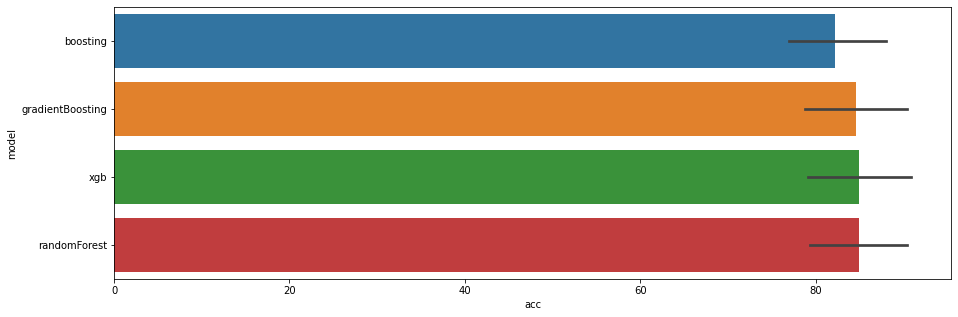

In [7]:
####### INSERT YOUR CODE HERE
import pandas as pd

resdf = pd.DataFrame({
        "dataset" : [name for name in accs for ntrees in accs[name]],
        "model" : [model for name in accs for model in accs[name]],
        "acc" : [accs[name][ntrees] for name in accs for ntrees in accs[name]]
    })

modelscores = resdf.groupby(["model"]).mean()["acc"].sort_values()
modelscores

plt.figure(figsize=(15,5))
sns.barplot(y="model", x="acc", data=resdf, order=modelscores.index)

## Bonus round: extreme tuning

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
Perform a more through hyper-parameter optimization, by means of changing the parameter ranges, exploring other model parameters, or increasing the number of trees in the ensembles. How much better can you fare?</font>

***